In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
tdf=pd.read_csv('test.csv')
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
tdf.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<Axes: xlabel='Pclass', ylabel='Age'>

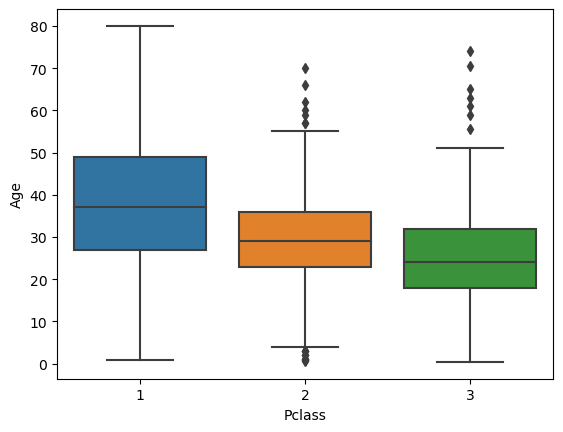

In [6]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [7]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [8]:
df[['Age','Pclass']]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [9]:
test_id=tdf["PassengerId"]

def clean(df):
    
    df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
    cols=['SibSp','Parch','Fare']
    for col in cols:
        df[col].fillna(df[col].median(),inplace=True)

    df.Embarked.fillna("U",inplace=True)
    embark=pd.get_dummies(df['Embarked'],drop_first=True)
    sex=pd.get_dummies(df['Sex'],drop_first=True)
    df=pd.concat([df,sex,embark],axis=1)
    
    return df

df=clean(df)
tdf=clean(tdf)
df=df.drop(['Ticket','Cabin','Name','PassengerId','Sex','Fare','Embarked'],axis=1)
tdf=tdf.drop(['Ticket','Cabin','Name','PassengerId','Sex','Fare','Embarked'],axis=1)

In [10]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S,U
0,0,3,22.0,1,0,1,0,1,0
1,1,1,38.0,1,0,0,0,0,0
2,1,3,26.0,0,0,0,0,1,0
3,1,1,35.0,1,0,0,0,1,0
4,0,3,35.0,0,0,1,0,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   male      891 non-null    uint8  
 6   Q         891 non-null    uint8  
 7   S         891 non-null    uint8  
 8   U         891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(4)
memory usage: 38.4 KB


In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S,U
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.066409,0.523008,0.381594,0.647587,0.086420,0.722783,0.002245
std,0.486592,0.836071,13.244532,1.102743,0.806057,0.477990,0.281141,0.447876,0.047351
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,37.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
tdf.head()

,Pclass,Age,SibSp,Parch,male,Q,S
0,3,34.5,0,0,1,1,0
1,3,47.0,1,0,0,0,1
2,2,62.0,0,0,1,1,0
3,3,27.0,0,0,1,0,1
4,3,22.0,1,1,0,0,1


In [14]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   male    418 non-null    uint8  
 5   Q       418 non-null    uint8  
 6   S       418 non-null    uint8  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 14.4 KB


In [15]:
tdf.describe()

,Pclass,Age,SibSp,Parch,male,Q,S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.321770,0.447368,0.392344,0.636364,0.110048,0.645933
std,0.841838,12.904065,0.896760,0.981429,0.481622,0.313324,0.478803
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,25.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,3.000000,36.375000,1.000000,0.000000,1.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

X=df.drop("Survived",axis=1)
y=df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
lr=LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [19]:
prediction=lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8161434977578476

In [25]:
dat=[[1,25,0,0,0,0,1,0]]
lr.predict(dat)


C:\Users\vinit\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [28]:
dat=[[1,23,1,0,1,0,1,0]]
lr.predict(dat)

C:\Users\vinit\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       134
           1       0.78      0.75      0.77        89

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



In [32]:
confusion_matrix(y_test,prediction)

array([[115,  19],
       [ 22,  67]], dtype=int64)